# SELİN CANSU AKBAŞ - 191180005

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv(r"C:\Users\Selin\Desktop\titanic\train.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Question 1

In [3]:
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# Question 2

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Question 3

In [5]:
print("Passenger Size:",len(titanic))

Passenger Size: 891


The number of passengers.

# Question 4

In [6]:
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Some passengers' age, cabin and embarked values are missing. As shown above, 177 of the passengers has no age data, 687 passengers have no cabin data and 2 passengers have no embarked data.

# Question 5

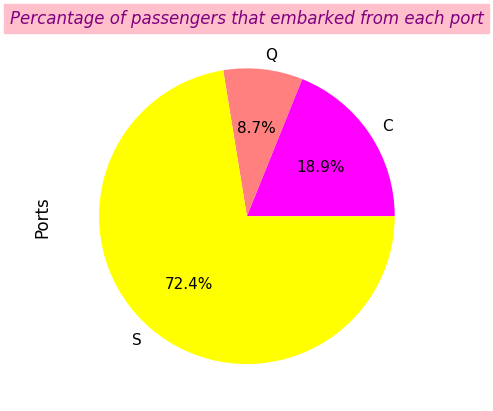

In [7]:
titanic.groupby('Embarked').size().plot(kind='pie',autopct='%1.1f%%',cmap='spring',fontsize=11)
plt.title(label="Percantage of passengers that embarked from each port",fontsize=12,color="purple",backgroundcolor='pink',fontstyle='italic');
plt.ylabel('Ports',fontsize=12);

As shown above in pie chart, Southampton has the most number of people embarked from. Queenstown has the least amount of people embarked from.

# Question 6

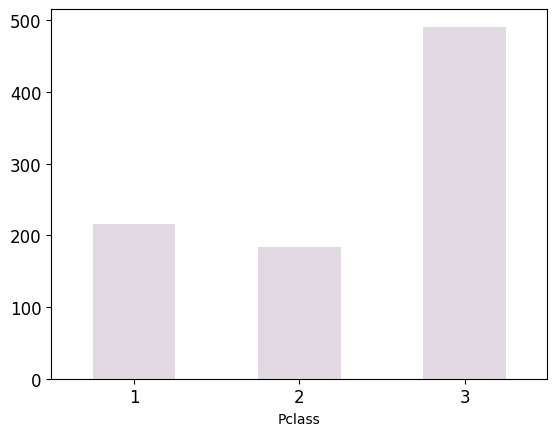

In [8]:
titanic.groupby('Pclass').size().plot(kind='bar',fontsize=12,cmap='twilight',rot=0);

3rd class has the most number of passengers.

# Question 7

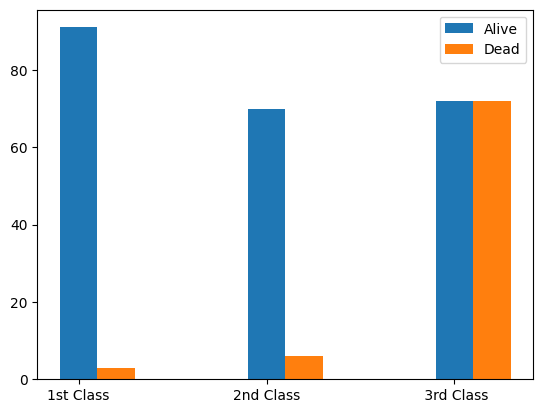

In [9]:
sf1_alive=titanic[(titanic["Pclass"] == 1) & (titanic["Sex"] == "female") & (titanic["Survived"] == 1)]
sf2_alive=titanic[(titanic["Pclass"] == 2) & (titanic["Sex"] == "female") & (titanic["Survived"] == 1)]
sf3_alive=titanic[(titanic["Pclass"] == 3) & (titanic["Sex"] == "female") & (titanic["Survived"] == 1)]
sf1_dead=titanic[(titanic["Pclass"] == 1) & (titanic["Sex"] == "female") & (titanic["Survived"] == 0)]
sf2_dead=titanic[(titanic["Pclass"] == 2) & (titanic["Sex"] == "female") & (titanic["Survived"] == 0)]
sf3_dead=titanic[(titanic["Pclass"] == 3) & (titanic["Sex"] == "female") & (titanic["Survived"] == 0)]

alive = [len(sf1_alive),len(sf2_alive),len(sf3_alive)]
dead = [len(sf1_dead),len(sf2_dead),len(sf3_dead)]

#plt.subplot(1, 3, 1)
plt.bar([1,2,3], alive, width = 0.2, label = "Alive")
plt.bar([1.2,2.2,3.2], dead, width = 0.2, label = "Dead")
plt.xticks([1,2,3], ["1st Class", "2nd Class", " 3rd Class"])
plt.legend()

# Question 8

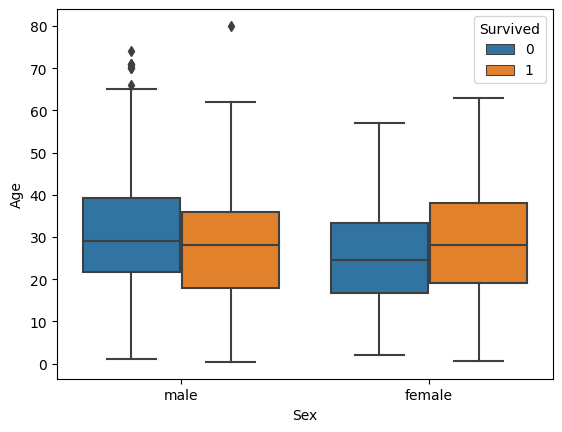

In [10]:
sns.boxplot(x ="Sex", y ="Age", hue ="Survived", data = titanic)
plt.xlabel('Sex');
plt.ylabel('Age');

# Question 9 - 10

In [11]:
pd.crosstab(titanic['Sex'], titanic['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In general, more females survived than male passengers. No female passenger died, all of them were rescued. But almost all of the male passengers died. It is because females and children were top priority when rescuing happened.

# Question 11

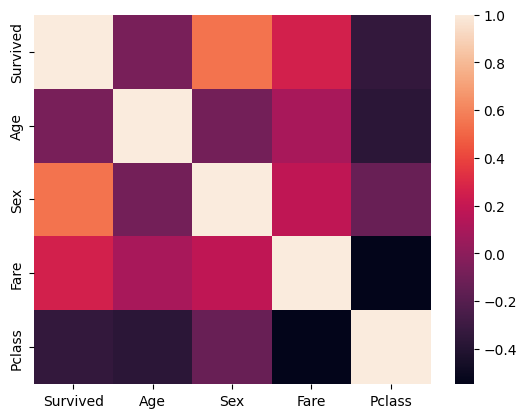

In [12]:
titanic.Sex.replace(('male','female'), (0,1), inplace = True)
list1 = ["Survived", "Age", "Sex", "Fare", "Pclass"]
sns.heatmap(titanic[list1].corr(), fmt = ".2f")
plt.show()

# Question 12

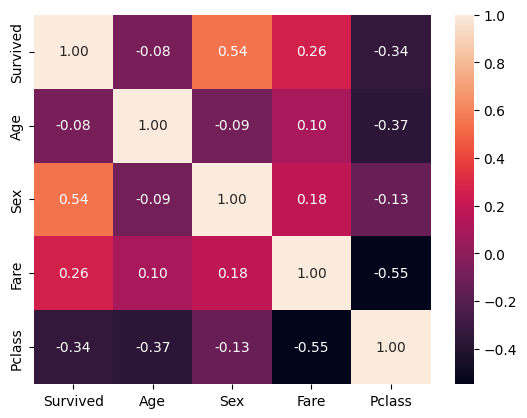

In [13]:
titanic.Sex.replace(('male','female'), (0,1), inplace = True)
list1 = ["Survived", "Age", "Sex", "Fare", "Pclass"]
sns.heatmap(titanic[list1].corr(method = "pearson"), annot = True, fmt = ".2f")
plt.show()

1st ticket class has the most survival rate. First-class passengers had been rescued first because most of them were from royalty and they were privileged. 3rd class passengers had paid much less money and they were not the top priority.

# Question 13

In [14]:
titanic.dropna(subset = 'Age')
youngest_passenger=titanic['Age']
print("The youngest passenger's age is : ",youngest_passenger.min())

The youngest passenger's age is :  0.42


# Question 14

In [15]:
titanic.dropna(subset = 'Fare')
print("The average fare:",titanic['Fare'].mean())

The average fare: 32.204207968574636


# Question 15

In [16]:
titanic.dropna(subset = 'Age')
oldest_survivor=titanic['Age'].where(titanic['Survived'] == 1)
print("The oldest survivor's age is : ",oldest_survivor.max())

The oldest survivor's age is :  80.0


# Question 16

In [17]:
titanic = pd.read_csv(r"C:\Users\Selin\Desktop\titanic\train.csv")
gender=titanic["Sex"] == "female"
titanic_female=titanic[gender]
titanic_female.dropna(subset = ["Age"])
oldest_survivor=titanic_female['Age'].where(titanic_female['Survived'] == 1)
print("The oldest female survivor's age is : ",oldest_survivor.max())

The oldest female survivor's age is :  63.0


# Question 17

In [18]:
agedrop = titanic.dropna(subset = ["Age"])
child = agedrop[(agedrop.Age < 10) & (agedrop.Parch == 0)] 
print(child)

     PassengerId  Survived  Pclass                           Name     Sex  \
777          778         1       3  Emanuel, Miss. Virginia Ethel  female   

     Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
777  5.0      0      0  364516  12.475   NaN        S  


As seen above, there is one child under 10 years old. The reason why this child does not have a parent may be that he is being abducted at that moment. They may be employing child labor on the ship or he may have been put on a ship to be sent somewhere by her family. May be traveling with grandparents.

# Question 18

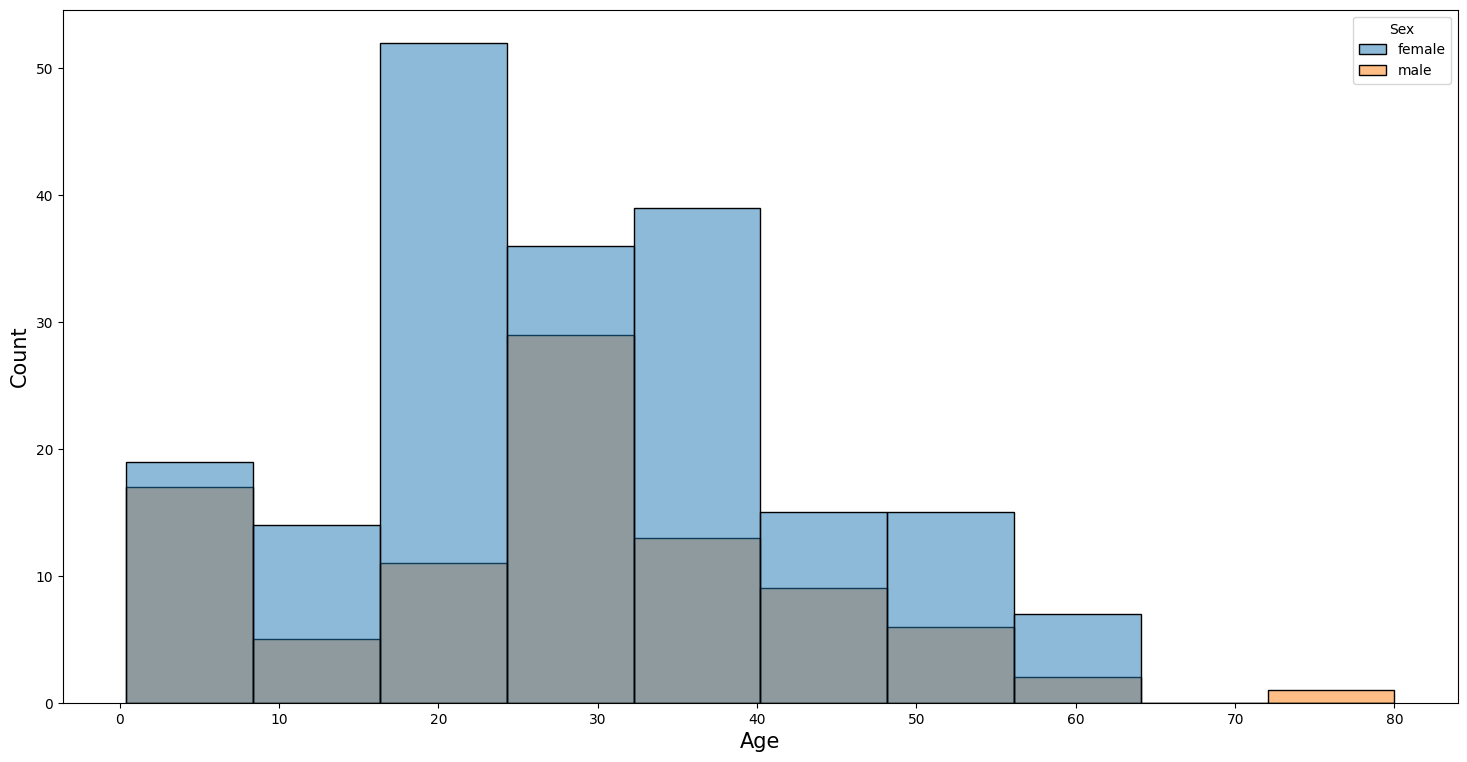

In [19]:
plt.figure(figsize=(18,9))
sns.histplot(data=titanic[titanic['Survived'] == 1], x='Age', hue='Sex', bins=10)
plt.xlabel("Age",fontsize=15);
plt.ylabel("Count",fontsize=15);

In general, more females survived than male passengers. No female passenger died, all of them were rescued. But almost all of the male passengers died. It is because females and children were top priority when rescuing happened.

# Question 19

In [20]:
highest_sibling=titanic['SibSp'].max()
print("The number of siblings of the passenger who has the highest number of sibling:", highest_sibling)

The number of siblings of the passenger who has the highest number of sibling: 8


# Question 20

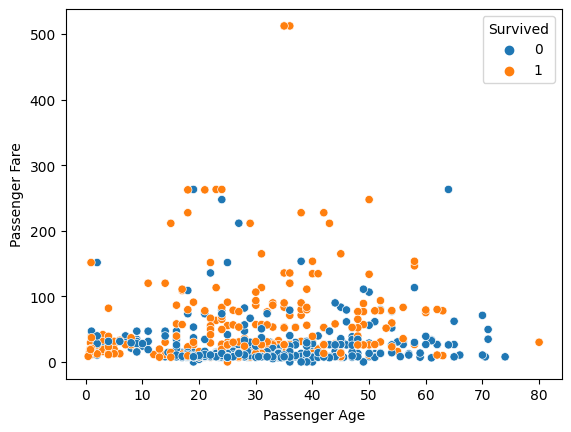

In [21]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=titanic)
plt.xlabel("Passenger Age");
plt.ylabel("Passenger Fare");